In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [14]:
import category_encoders as ce

In [36]:
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf

In [3]:
from sklearn.metrics import log_loss
from keras.losses import BinaryCrossentropy as LogLoss
from keras.metrics import BinaryCrossentropy

In [4]:
from keras.layers import Dense, Activation, Input, Concatenate, Dropout

In [5]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup

In [6]:
import keras
from keras.models import Model
import kerastuner

## Keras notebook, improvement over moa-basic-keras
1. Manually transform data: categorical, simple MinMaxScaler, categorical, PowerTransformer.
1. Run another basic autokeras on this more amenable dataset.
1. Tune the resulting keras-from-autokeras model.
1. Architect a similar model to one of the top performing notebooks on Kaggle.
1. Tune this model architecture.
1. Compare results and consider possibilities for improvements:
    1. Transformers
    1. RNNs
    1. Do more research
1. Additional possibilities from Kaggle notebooks and elsewhere:
    1. More sophisticated dimensionality reduction with t-SNE
    

In [7]:
tf_df = pd.read_csv('../train_features.csv',index_col='sig_id')
tts_df = pd.read_csv('../train_targets_scored.csv',index_col='sig_id')
tf_df['cp_type']=tf_df['cp_type'].astype('category')
scaler = MinMaxScaler(feature_range=(-0.5,0.5))
tf_df['cp_time']=scaler.fit_transform((np.array(tf_df['cp_time'])).reshape(-1,1))
tf_df['cp_dose']=tf_df['cp_dose'].astype('category')
transformer = PowerTransformer()
tf_df.loc[:,'g-0':'c-99']=transformer.fit_transform(tf_df.loc[:,'g-0':'c-99'])

In [15]:
print(tf_df['cp_type'].unique(),tf_df['cp_dose'].unique())

['trt_cp', 'ctl_vehicle']
Categories (2, object): ['trt_cp', 'ctl_vehicle'] ['D1', 'D2']
Categories (2, object): ['D1', 'D2']


In [20]:
oenc = ce.ordinal.OrdinalEncoder()
tf_df = oenc.fit_transform(tf_df)
tf_df.sample(20)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,
id_75f46d9ab,1,0.5,2,0.963691,-1.529219,0.693584,0.666529,-1.214860,-0.630650,0.488917,...,-0.561065,0.632787,0.350276,-0.971427,-1.024303,-0.348984,0.377310,-0.138003,-0.753494,-1.063584
id_2db441d31,1,0.5,1,-1.463594,0.125811,-0.102627,-0.111989,-1.450209,-0.035555,-1.445152,...,-0.346239,0.076257,-0.149316,-0.781710,0.356436,0.027454,0.146933,0.087377,0.631928,-0.567816
id_c591bf2bb,1,0.5,2,-0.519022,-0.434236,-0.607240,-0.269033,0.196346,0.073502,-1.436547,...,0.471262,-0.080228,-0.578749,-0.358420,0.332247,0.212232,-0.609066,0.502353,-0.133571,-0.358799
id_6c50803b6,1,0.5,2,0.171931,-1.048094,-0.924831,0.115426,0.426776,0.889848,-0.649869,...,-0.568360,-0.260563,0.113986,-0.032827,0.871530,-0.066601,-0.523688,0.540554,0.422924,0.839676
id_a0aa0808e,1,-0.5,1,0.696059,0.227740,0.468529,-0.494309,0.592163,-0.217238,0.518026,...,-0.563847,-0.713667,0.032257,-0.332194,-0.004120,-1.008435,-0.075459,-0.284092,-0.270491,-0.201682
id_a62f9790b,1,0.5,2,0.749932,0.276483,0.767871,1.044373,-0.607015,1.484380,0.513965,...,0.028515,-0.481151,-0.984931,1.626991,-0.972173,-0.682378,-1.072313,-0.927654,-1.984785,-0.141644
id_56d49fa44,2,0.5,1,0.225885,-0.133405,1.828622,0.892585,-0.431713,0.616938,1.286786,...,-0.116110,-0.228866,0.761341,0.149154,0.231985,-0.086102,0.388245,-0.586987,1.070836,0.593581
id_e7a86c67b,1,-0.5,2,-0.831882,0.646231,0.311856,0.653661,0.305291,1.215803,1.262475,...,-0.119858,-0.345023,-0.416025,-0.836144,-0.426868,-0.659303,-0.165056,-0.884281,-0.457706,-0.910347
id_fca59843f,1,0.0,1,-1.127506,0.257595,0.825873,0.187937,-0.416086,3.255588,-0.379797,...,0.777152,1.963116,-0.019844,-0.380619,0.230403,0.191431,1.272574,-0.536080,2.822624,-0.068249


1 and 2? Not 0 and 1? That's unexpected, but acceptable... I guess...

Nah, let's fix it.

In [21]:
tf_df['cp_type']=tf_df['cp_type']-1
tf_df['cp_dose']=tf_df['cp_dose']-1
tf_df.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,0,-0.5,0,0.840092,0.799637,-0.360212,-0.762460,-0.179328,-0.800311,-1.221088,...,0.295563,0.242258,1.188661,0.703233,-0.222693,0.907273,-0.379112,0.207515,0.452733,0.535869
id_000779bfc,0,0.5,0,0.095368,0.609459,0.173882,0.084506,0.954197,0.521283,0.252322,...,-0.423036,1.001666,0.595257,-0.024396,0.278554,0.621834,0.106823,0.092897,0.825402,1.086585
id_000a6266a,0,0.0,0,0.551203,0.830403,1.326615,-0.072048,-0.012249,1.299872,0.182260,...,-0.623206,-0.560964,0.825958,-0.025155,-0.889025,-0.351895,-0.539747,-0.269317,-0.979799,1.004859
id_0015fd391,0,0.0,0,-0.572952,-0.209667,-0.377930,0.573085,3.239971,-0.648433,-2.386051,...,-1.240634,-0.570106,-2.002505,-0.956728,-0.666720,-0.984704,-1.019698,-0.750962,-0.393019,-0.739837
id_001626bd3,0,0.5,1,-0.335672,-0.393710,0.799549,0.730024,1.286056,-0.659770,-0.334582,...,-0.044471,-0.051529,0.925819,1.711194,0.630494,-0.339604,0.060484,0.309193,-0.386036,1.040662


Where's my EASY button...

In [8]:
print(tf_df.shape, tts_df.shape)

(23814, 875) (23814, 206)


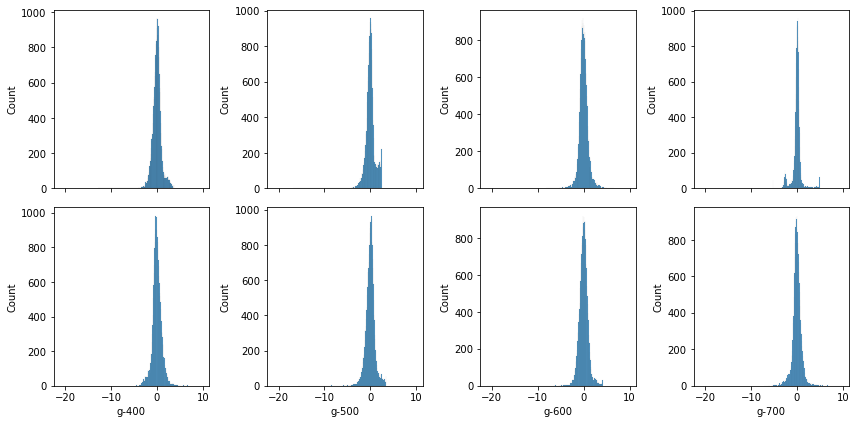

In [9]:
f, axs = plt.subplots(2,4,figsize=(12,6),sharex=True)
for i in range(0,701,100):
    sns.histplot(data=tf_df,x='g-'+str(i),ax=axs[i//400,i%400//100])
f.tight_layout()

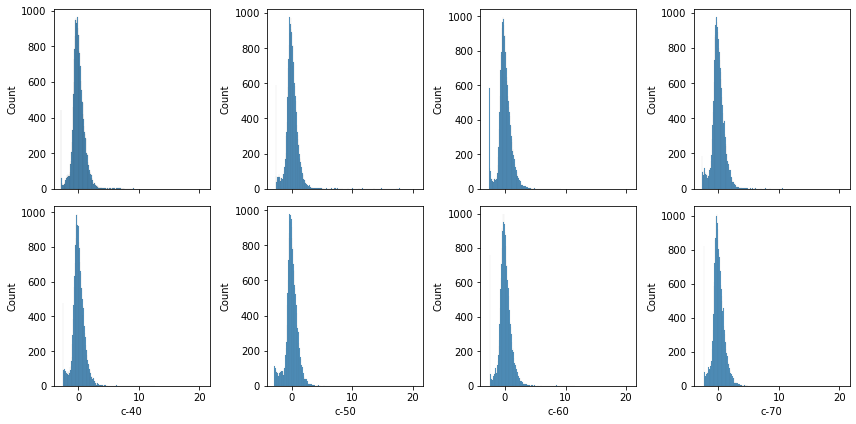

In [10]:
f, axs = plt.subplots(2,4,figsize=(12,6),sharex=True)
for i in range(0,71,10):
    sns.histplot(data=tf_df,x='c-'+str(i),ax=axs[i//40,i%40//10])
f.tight_layout()

Not as elegant as I hoped, but to my knowledge this should train significantly better.

AutoKeras second model
```Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         [(None, 875)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 875)               0         
_________________________________________________________________
normalization (Normalization (None, 875)               1751      
_________________________________________________________________
dense (Dense)                (None, 64)                56064     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 206)               105678    
_________________________________________________________________
classification_head_1 (Softm (None, 206)               0         
=================================================================
Total params: 199,077
Trainable params: 196,174
Non-trainable params: 2,903
_________________________________________________________________
```

Compare this to the previous autokeras model. This one's log loss is even a little worse than that one; neither is at all credible.

AutoKeras alternative model
```Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         [(None, 875)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 875)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                56064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 206)               13390     
_________________________________________________________________
classification_head_3 (Activ (None, 206)               0         
=================================================================
Total params: 69,454
Trainable params: 69,454
Non-trainable params: 0
_________________________________________________________________
```

Still not sure why the eff autokeras was including a `multi_category_encoding` layer. Probably because the dataframe had text categories in it. Now manually feeding binaries for the `cp_type` and `cp_dose` columns.

I tried the manual preprocessing steps taken from https://keras.io/examples/structured_data/structured_data_classification_from_scratch/ but it wound up in an infinite loop (the self-vomit is in the moa-autokeras notebook).

From that, I really want to dig into what the best practices are for prepping data for keras. Obviously to even have a credible entry here I think we need to be at least state of the art.

https://keras.io/getting_started/intro_to_keras_for_engineers/

This is getting more and more comprehensible the more often I look at it. I see that they recommend using a Keras pipeline to preprocess data, and I can get the advantage, but for now I'll stick with the collection of methods I've got and see if there's any need to figure out how to, say, map categories to labels with Keras tools later. Or for another project.

In [23]:
tf_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23814 entries, id_000644bb2 to id_ffffdd77b
Columns: 875 entries, cp_type to c-99
dtypes: float64(873), int64(2)
memory usage: 159.2+ MB


In [26]:
tts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23814 entries, id_000644bb2 to id_ffffdd77b
Columns: 206 entries, 5-alpha_reductase_inhibitor to wnt_inhibitor
dtypes: int64(206)
memory usage: 37.6+ MB


Floats and ints now, just like it needs to be.

Let's hardcode these into numpy arrays since that's technically what Keras wants.

In [25]:
tf_arr = np.array(tf_df)
tts_arr = np.array(tts_df)

In [27]:
inputs = Input(shape=(875,))
x = Dense(64,activation='elu')(inputs)
x = Dropout(0.2,input_shape=(64,))(x)
outputs = Dense(206,activation='sigmoid')(x)
model1 = Model(inputs,outputs)

In [31]:
model1.compile("adam", "binary_crossentropy", metrics=["binary_crossentropy"])

In [29]:
model1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 875)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                56064     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 206)               13390     
Total params: 69,454
Trainable params: 69,454
Non-trainable params: 0
_________________________________________________________________


In [32]:
n_epochs = 40
n_batch = 32
print('Starting Training')
model1.fit(tf_arr,tts_arr,epochs=n_epochs,batch_size=n_batch)
print('Finished Training')

Starting Training
Epoch 1/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0658 - binary_crossentropy: 0.0658
Epoch 2/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0215 - binary_crossentropy: 0.0215
Epoch 3/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0189 - binary_crossentropy: 0.0189
Epoch 4/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0173 - binary_crossentropy: 0.0173
Epoch 5/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0163 - binary_crossentropy: 0.0163
Epoch 6/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0155 - binary_crossentropy: 0.0155
Epoch 7/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0149 - binary_crossentropy: 0.0149
Epoch 8/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0143 - binary_crossentropy: 0.0143
Epoch 9/40
745/745 [==============================] - 2s 3ms/step - loss: 0.0139 - binary_cros

In [33]:
tts_pred = model1.predict(tf_arr)
log_loss(tts_arr,tts_pred)

0.9448341977978864

All right, THAT'S the beginning of a credible model. I don't know why Keras seems to report a binary crossentropy 100x smaller than scikit-learn, but whatever.

Now let's tune.

In [34]:
def build_model(hp):
    inputs = Input(shape=(875,))
    x = Dense(
        units = hp.Int('units',min_value=32,max_value=512,step=32),
        activation = hp.Choice('activation function',values=['relu','elu'])
    )(inputs)
    x = Dropout(hp.Choice('dropout',values=[0.2,0.35,0.5]))(x)
    outputs = Dense(206,activation = hp.Choice('classify function',values =
                                              ['sigmoid','softmax']))(x)
    model = Model(inputs, outputs)
    # should throw in a choice of optimizer here: adam, etc.
    model.compile(loss='binary_crossentropy',metrics=['binary_crossentropy'])
    return model

In [35]:
tuner = kerastuner.tuners.Hyperband(
        build_model,
        objective='binary_crossentropy',
        max_epochs=20,
        executions_per_trial=2,
        directory='keras_tune'
)

In [37]:
print('Starting Tuning')
X_train, X_val, y_train, y_val = train_test_split(tf_arr,tts_arr,test_size=0.2,random_state=84)
tuner.search(X_train,y_train,validation_data=(X_val,y_val))
print('Finished Tuning')

Trial 30 Complete [00h 03m 27s]
binary_crossentropy: 0.016959709115326405

Best binary_crossentropy So Far: 0.006487071514129639
Total elapsed time: 00h 40m 33s
INFO:tensorflow:Oracle triggered exit
Finished Tuning


Well, hell, I forgot to define an optimizer. I don't even know what the default is. Looking at the docs, it's apparently RMSprop, which is not familiar to me.

Chollet messed up and put this reasonably comprehensible notebook up on Kaggle: https://www.kaggle.com/fchollet/keras-kerastuner-best-practices/ Let's try the next steps from there.

In [39]:
best_hp = tuner.get_best_hyperparameters()[0]
model2 = build_model(best_hp)
history = model2.fit(tf_arr, tts_arr, validation_split=0.2, epochs=50)

Epoch 1/50
596/596 [==============================] - 5s 8ms/step - loss: 0.0194 - binary_crossentropy: 0.0194 - val_loss: 0.0190 - val_binary_crossentropy: 0.0190
Epoch 2/50
596/596 [==============================] - 5s 8ms/step - loss: 0.0167 - binary_crossentropy: 0.0167 - val_loss: 0.0189 - val_binary_crossentropy: 0.0189
Epoch 3/50
596/596 [==============================] - 5s 8ms/step - loss: 0.0148 - binary_crossentropy: 0.0148 - val_loss: 0.0190 - val_binary_crossentropy: 0.0190
Epoch 4/50
596/596 [==============================] - 5s 8ms/step - loss: 0.0133 - binary_crossentropy: 0.0133 - val_loss: 0.0195 - val_binary_crossentropy: 0.0195
Epoch 5/50
596/596 [==============================] - 5s 8ms/step - loss: 0.0118 - binary_crossentropy: 0.0118 - val_loss: 0.0205 - val_binary_crossentropy: 0.0205
Epoch 6/50
596/596 [==============================] - 5s 8ms/step - loss: 0.0106 - binary_crossentropy: 0.0106 - val_loss: 0.0212 - val_binary_crossentropy: 0.0212
Epoch 7/50
596/5

Oh wow that's overtrained.

In [41]:
val_logloss_per_epoch = history.history['val_binary_crossentropy']
best_epoch = val_logloss_per_epoch.index(max(val_logloss_per_epoch)) + 1
best_epoch

49

It did keep going down right to the bitter end.

In [43]:
model2a = build_model(best_hp)
model2a.fit(tf_arr, tts_arr, epochs=best_epoch)

Epoch 1/49
745/745 [==============================] - 5s 7ms/step - loss: 0.0194 - binary_crossentropy: 0.0194
Epoch 2/49
745/745 [==============================] - 5s 7ms/step - loss: 0.0169 - binary_crossentropy: 0.0169
Epoch 3/49
745/745 [==============================] - 5s 7ms/step - loss: 0.0156 - binary_crossentropy: 0.0156
Epoch 4/49
745/745 [==============================] - 5s 7ms/step - loss: 0.0145 - binary_crossentropy: 0.0145
Epoch 5/49
745/745 [==============================] - 5s 7ms/step - loss: 0.0135 - binary_crossentropy: 0.0135
Epoch 6/49
745/745 [==============================] - 6s 7ms/step - loss: 0.0126 - binary_crossentropy: 0.0126
Epoch 7/49
745/745 [==============================] - 5s 6ms/step - loss: 0.0119 - binary_crossentropy: 0.0119
Epoch 8/49
745/745 [==============================] - 5s 7ms/step - loss: 0.0111 - binary_crossentropy: 0.0111
Epoch 9/49
745/745 [==============================] - 5s 7ms/step - loss: 0.0105 - binary_crossentropy: 0.0105
E

In [44]:
model2a.evaluate(tf_arr,tts_arr)

745/745 [==============================] - 2s 3ms/step - loss: 0.0041 - binary_crossentropy: 0.0041


[0.0041186916641891, 0.0041186916641891]

In [45]:
testf_df = pd.read_csv('../test_features.csv',index_col='sig_id')

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
sig_id,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,1.149854e-08,1.009855e-06,1.598330e-06,9.806657e-13,1.791366e-10,6.741531e-12,1.180608e-07,8.762728e-16,5.737312e-11,1.685762e-10,...,2.155235e-10,7.884828e-14,3.458643e-10,2.669476e-08,2.235003e-09,2.338929e-12,7.035793e-07,9.826908e-07,8.954578e-13,9.040984e-10
id_000779bfc,3.673011e-06,1.238275e-07,2.067611e-03,6.966269e-06,1.088533e-03,9.449268e-02,7.698034e-04,1.925630e-04,3.121804e-12,2.972094e-04,...,6.552656e-11,2.568645e-09,1.668708e-04,4.556016e-10,8.557691e-04,4.059040e-19,1.072134e-04,3.464632e-03,4.404046e-04,1.704473e-03
id_000a6266a,2.360569e-10,5.333301e-09,4.175471e-09,1.682953e-11,9.093009e-08,2.576592e-13,3.748416e-14,1.068496e-14,2.095980e-10,1.512659e-09,...,4.426544e-08,3.735992e-09,9.587818e-13,3.778852e-07,1.940925e-06,4.318987e-10,2.623498e-03,4.004799e-11,2.066891e-15,9.569996e-11
id_0015fd391,2.669782e-15,3.065745e-16,1.194822e-13,9.299768e-17,1.235072e-10,1.503941e-19,3.761569e-21,7.957158e-16,4.779623e-12,6.933559e-15,...,3.889157e-12,4.621620e-07,1.965386e-14,1.559413e-04,8.687838e-09,1.095220e-09,3.371876e-05,4.070777e-15,7.467573e-13,1.195893e-21
id_001626bd3,1.995974e-10,6.715236e-07,1.231098e-07,1.055675e-11,1.620400e-12,1.396014e-20,3.179630e-11,6.402321e-15,5.338954e-11,8.128759e-13,...,3.703893e-09,2.138442e-12,1.872181e-14,6.876806e-10,1.835307e-11,2.619044e-13,4.356002e-09,1.591489e-08,2.505049e-11,1.975386e-10


In [46]:
testf_df['cp_type']=testf_df['cp_type'].astype('category')
testf_df['cp_time']=scaler.transform((np.array(testf_df['cp_time'])).reshape(-1,1))
testf_df['cp_dose']=testf_df['cp_dose'].astype('category')
testf_df.loc[:,'g-0':'c-99']=transformer.transform(testf_df.loc[:,'g-0':'c-99'])
testf_df = oenc.transform(testf_df)
testf_df['cp_type']=testf_df['cp_type']-1
testf_df['cp_dose']=testf_df['cp_dose']-1
testf_arr = np.array(testf_df)

In [ ]:
tts_pred2 = model2a.predict(testf_arr)
sub_df = pd.DataFrame(tts_pred2,index=testf_df.index,columns=tts_df.columns)
sub_df.head()

In [ ]:
sub_df.to_csv('../submission.csv')